## PROBABILIDADES

#### Librerias Importadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Leer archivo

In [2]:
df_estudiantes = pd.read_csv('db/datos_estudiantes.csv', sep=';')
df_estudiantes

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [3]:
df_prob = df_estudiantes[['absences', 'G3']].copy()
df_prob.head()

,absences,G3
0,4,11
1,2,11
2,6,12
3,0,14
4,0,13


In [4]:
df_prob.describe()

,absences,G3
count,649.000000,649.000000
mean,3.659476,11.906009
std,4.640759,3.230656
min,0.000000,0.000000
25%,0.000000,10.000000
50%,2.000000,12.000000
75%,6.000000,14.000000
max,32.000000,19.000000


array([[<Axes: title={'center': 'absences'}>,
        <Axes: title={'center': 'G3'}>]], dtype=object)

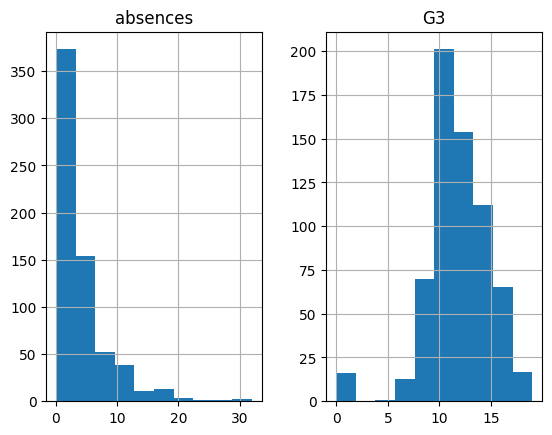

In [5]:
df_prob.hist()

<Axes: >

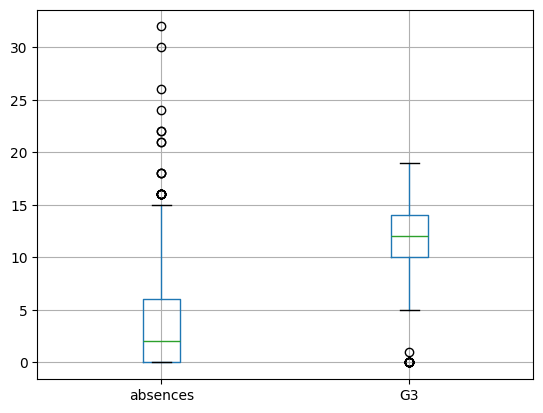

In [6]:
df_prob.boxplot()

#### Nota G3: 0 - 20

#### Probabilidad de conseguir una nota mayor a 60 (0 - 100) dado que el número de ausencias es más de 5

In [7]:
df_prob['G3'] = df_prob['G3'] * 5

In [8]:
df_prob

,absences,G3
0,4,55
1,2,55
2,6,60
3,0,70
4,0,65
...,...,...
644,4,50
645,4,80
646,6,45
647,6,50


### Probabilidad conjunta 

In [9]:
df_prob['prob_nota_absenc'] = np.where((df_prob['absences'] > 5) & (df_prob['G3'] > 60), 1, 0)
df_prob 

,absences,G3,prob_nota_absenc
0,4,55,0
1,2,55,0
2,6,60,0
3,0,70,0
4,0,65,0
...,...,...,...
644,4,50,0
645,4,80,0
646,6,45,0
647,6,50,0


#### Conteo de notas y ausencias

In [10]:
df_prob['prob_nota_absenc'].value_counts()

prob_nota_absenc
0    594
1     55
Name: count, dtype: int64

In [11]:
porb_conjunta = df_prob['prob_nota_absenc'].mean()
print(f"La probabilidad de aprobación con más de 5 ausencias y una nota mayor a 60 es de: {porb_conjunta:.4f}")

La probabilidad de aprobación con más de 5 ausencias y una nota mayor a 60 es de: 0.0847


### Probabilidad condicional

In [12]:
df_prob['absences_2'] = np.where((df_prob['absences'] > 5), 1, 0)

In [13]:
df_prob 

,absences,G3,prob_nota_absenc,absences_2
0,4,55,0,0
1,2,55,0,0
2,6,60,0,1
3,0,70,0,0
4,0,65,0,0
...,...,...,...,...
644,4,50,0,0
645,4,80,0,0
646,6,45,0,1
647,6,50,0,1


#### Conteo de ausencias

In [14]:
df_prob['absences_2'].value_counts()

absences_2
0    478
1    171
Name: count, dtype: int64

In [15]:
absences_2 = df_prob['absences_2'].mean()

In [17]:
prob_condicional = porb_conjunta/absences_2
print(f"La porbabilidad de aprobar con una nota mayor a 60 dado que el número de ausencias es mayor a 5 es de: {prob_condicional:.4f}")

La porbabilidad de aprobar con una nota mayor a 60 dado que el número de ausencias es mayor a 5 es de: 0.3216
